In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [3]:
train_dataset = train.flow_from_directory('F:\datasets\szivacsok_bont/train', target_size= (200,200),
                                          batch_size = 3, class_mode ='categorical')
validation_dataset = train.flow_from_directory('F:\datasets\szivacsok_bont/validate', target_size= (200,200),
                                               athbatch_size = 3, class_mode ='categorical')

Found 253 images belonging to 4 classes.
Found 236 images belonging to 4 classes.


In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation ='relu', input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(4,activation = 'softmax')
])

In [12]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])

In [13]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 5,
                     epochs=1,
                     validation_data= validation_dataset,)

5/5 [==============================] - 30s 6s/step - loss: 0.6325 - accuracy: 0.7167 - val_loss: 0.5642 - val_accuracy: 0.7500


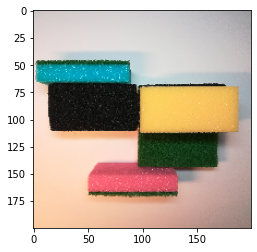

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
dir_path = "F:\datasets\szivacsok/phase_3"
for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size = (200,200,3))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("1")
    elif val == 1:
        print("2")
    elif val == 2:
        print("3")
    else:
        print="4"

In [ ]:
train_dataset.classes

In [ ]:
import pickle

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(model, 'model_joblib')